# Testing the solver with model (known analytical solution)

Take the model $f(x,y) = -y$, with initial value as (0,1). The analytical solution to this model is $y = e^{-x}$. 

The Euler's explicit method is tested with different stepsize. The numerical solution obtained with different stepsizes will then be compared with the analytical solution.

In [1]:
import solver

# Define the model
def func(x, y):
    return [-y[0]]

x_min = 0
x_max = 5
initial_value = [1]

stepsize_range = [1e-1, 1e-2, 1e-3, 1e-4]
meshpt_range = [(x_max - x_min) / step for step in stepsize_range]
mesh_list = []
soln_list = []
for mesh_points in meshpt_range:
    problem = solver.OneStepMethods(
        func, x_min, x_max, initial_value, mesh_points)

    # Solve with Euler's explicit method
    mesh, soln = problem.Euler_explicit()
    mesh_list.append(mesh)
    soln_list.append(soln)

## Comparison of numerical solution with analytical solution

An error, defined to be the L2 norm betwen numerical solution and exact solution, is calculated.

In [2]:
import numpy as np

def analytical_soln(x,y):
    return [np.exp(-x)]

exact_soln_list = []
error_list = []
for (mesh,soln) in zip(mesh_list,soln_list):
    exact_soln = []
    error = []
    for i in range(len(mesh)):
        exact_value = analytical_soln(mesh[i], soln[i])
        exact_soln.append(exact_value)
        
        err_value = np.linalg.norm(np.array(exact_value) - np.array(soln[i]))
        error.append(err_value)
        
    exact_soln_list.append(exact_soln)
    error_list.append(error)

## Plotting of results

The numerical solution of each stepsize is plotted in the left column graph below, overlaying the exact solution. The blue curve is the numerical solution, while the red curve is the analytical solution. The graph on the right column is the L2 norm between exact solution and numerical solution.

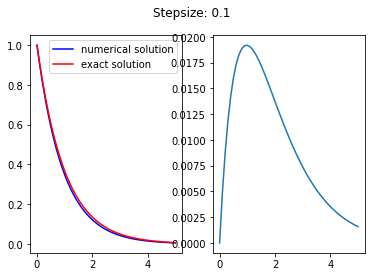

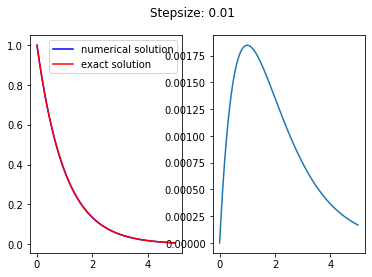

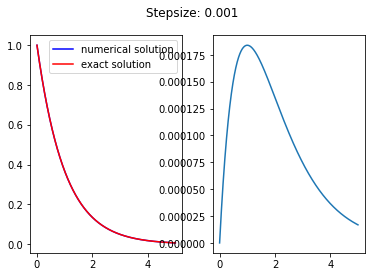

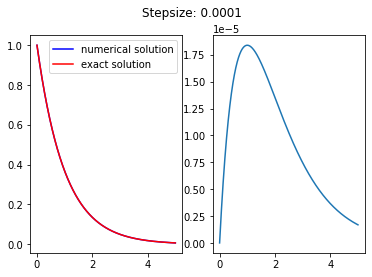

In [3]:
import matplotlib.pyplot as plt

for i in range(len(mesh_list)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Stepsize: ' + str(stepsize_range[i]))
    ax1.plot(mesh_list[i], soln_list[i], 'b', label='numerical solution')
    ax1.plot(mesh_list[i], exact_soln_list[i], 'r', label='exact solution')
    ax1.legend()
    ax2.plot(mesh_list[i], error_list[i])
    plt.show()

An error vs stepsize log-log plot is plotted below. As the stepsize decrease, the difference between the numerical solution and the exact solution decreases.

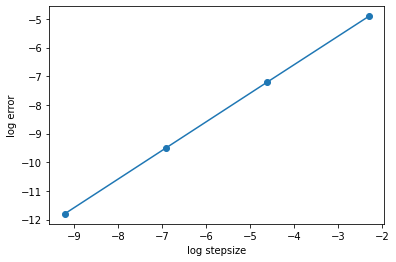

In [4]:
error_stepsize = []
for i in range(len(stepsize_range)):
    error_stepsize.append(error_list[i][int(3/stepsize_range[i])])

plt.figure()
plt.plot(np.log(np.array(stepsize_range)), np.log(np.array(error_stepsize)))
plt.scatter(np.log(np.array(stepsize_range)), np.log(np.array(error_stepsize)))
plt.xlabel('log stepsize')
plt.ylabel('log error')
plt.show()

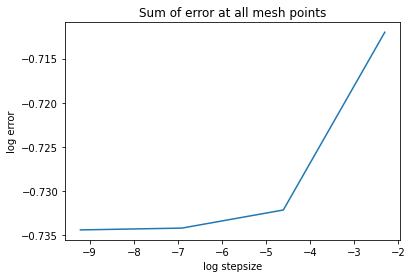

In [5]:
sum_error_stepsize = []
for i in range(len(stepsize_range)):
    sum_error_stepsize.append(np.sum(np.array(error_list[i])))

plt.figure()
plt.plot(np.log(np.array(stepsize_range)), np.log(np.array(sum_error_stepsize)))
plt.title('Sum of error at all mesh points')
plt.xlabel('log stepsize')
plt.ylabel('log error')
plt.show()

Testing Euler's explicit method with more stepsize

[0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125, 0.000390625, 0.0001953125, 9.765625e-05]


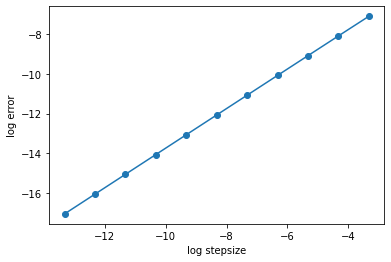

In [6]:
stepsize_range = [1e-1]
for i in range(10):
    stepsize_range.append(stepsize_range[-1] / 2)
print(stepsize_range)
meshpt_range = [(x_max - x_min) / step for step in stepsize_range]
mesh_list = []
soln_list = []
for mesh_points in meshpt_range:
    problem = solver.OneStepMethods(
        func, x_min, x_max, initial_value, mesh_points)

    # Solve with Euler's explicit method
    mesh, soln = problem.Euler_explicit()
    mesh_list.append(mesh)
    soln_list.append(soln)
    
exact_soln_list = []
error_list = []
for (mesh,soln) in zip(mesh_list,soln_list):
    exact_soln = []
    error = []
    for i in range(len(mesh)):
        exact_value = analytical_soln(mesh[i], soln[i])
        exact_soln.append(exact_value)
        
        err_value = np.linalg.norm(np.array(exact_value) - np.array(soln[i]))
        error.append(err_value)
        
    exact_soln_list.append(exact_soln)
    error_list.append(error)
    
error_stepsize = []
for i in range(len(stepsize_range)):
    error_stepsize.append(error_list[i][int(3/stepsize_range[i])])

plt.figure()
plt.plot(np.log2(np.array(stepsize_range)), np.log2(np.array(error_stepsize)))
plt.scatter(np.log2(np.array(stepsize_range)), np.log2(np.array(error_stepsize)))
plt.xlabel('log stepsize')
plt.ylabel('log error')
plt.show()

## Testing of predictor - corrector method

Similar comparison is done with the Euler's explicit - trapezium method (predictor - corrector method).

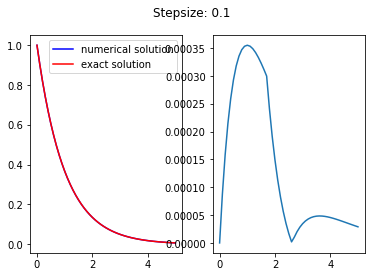

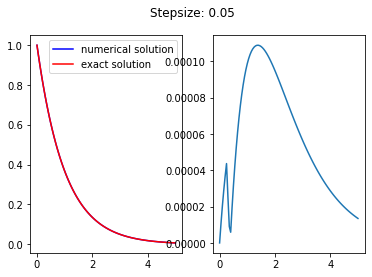

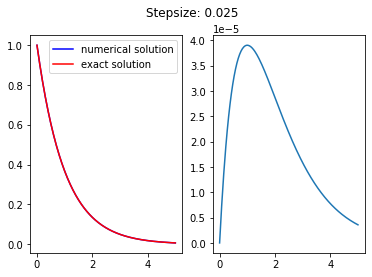

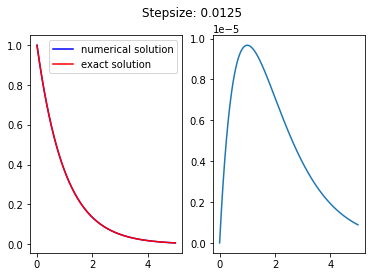

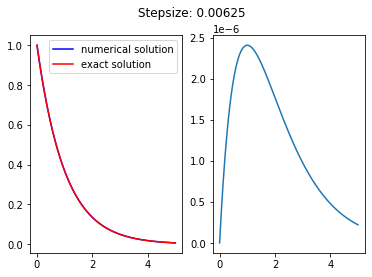

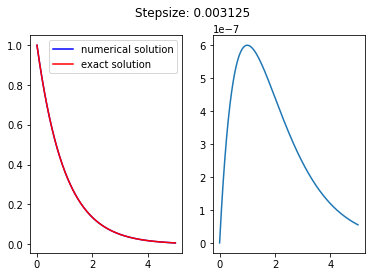

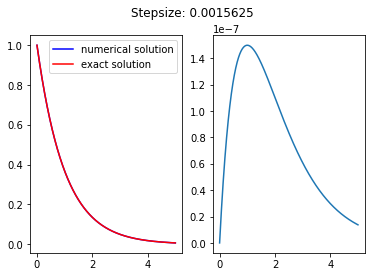

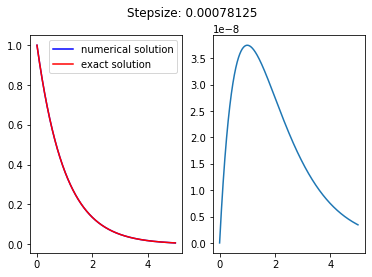

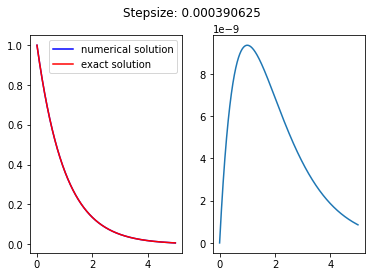

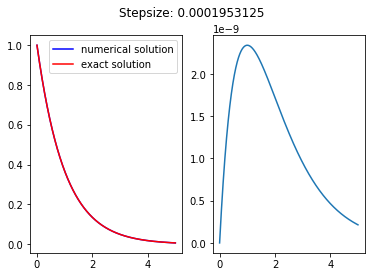

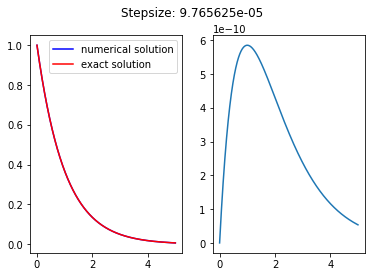

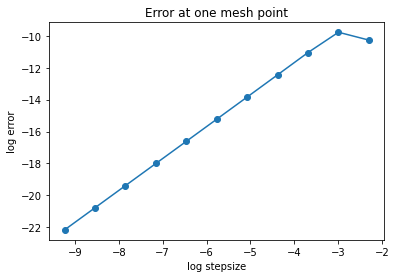

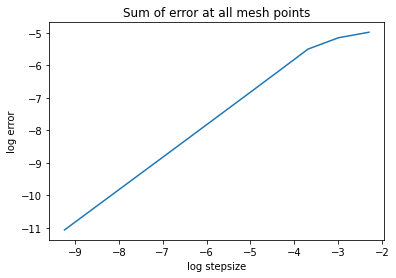

In [7]:
stepsize_range = [1e-1, 1e-2, 1e-3, 1e-4]
meshpt_range = [(x_max - x_min) / step for step in stepsize_range]

mesh_list = []
soln_list = []
for mesh_points in meshpt_range:
    problem = solver.PredictorCorrector(
        func, x_min, x_max, initial_value, mesh_points)

    # Solve with Euler's explicit - trapezium method
    mesh, soln = problem.Euler_trapezium()
    mesh_list.append(mesh)
    soln_list.append(soln)

# Calculation of exact solution for given mesh points
# Calculation of difference between exact solution and numerical solution
exact_soln_list = []
error_list = []
for (mesh,soln) in zip(mesh_list,soln_list):
    exact_soln = []
    error = []
    for i in range(len(mesh)):
        exact_value = analytical_soln(mesh[i], soln[i])
        exact_soln.append(exact_value)
        
        err_value = np.linalg.norm(np.array(exact_value) - np.array(soln[i]))
        error.append(err_value)
        
    exact_soln_list.append(exact_soln)
    error_list.append(error)

# Plot of numerical solution and exact solution
# Plot of error
for i in range(len(mesh_list)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Stepsize: ' + str(stepsize_range[i]))
    ax1.plot(mesh_list[i], soln_list[i], 'b', label='numerical solution')
    ax1.plot(mesh_list[i], exact_soln_list[i], 'r', label='exact solution')
    ax2.plot(mesh_list[i], error_list[i])
    ax1.legend()
    plt.show()
    
error_stepsize = []
for i in range(len(stepsize_range)):
    error_stepsize.append(error_list[i][int(3/stepsize_range[i])])

plt.figure()
plt.plot(np.log(np.array(stepsize_range)), np.log(np.array(error_stepsize)))
plt.scatter(np.log(np.array(stepsize_range)), np.log(np.array(error_stepsize)))
plt.title('Error at one mesh point')
plt.xlabel('log stepsize')
plt.ylabel('log error')
plt.show()    

sum_error_stepsize = []
for i in range(len(stepsize_range)):
    sum_error_stepsize.append(np.sum(np.array(error_list[i])))

plt.figure()
plt.plot(np.log(np.array(stepsize_range)), np.log(np.array(sum_error_stepsize)))
plt.title('Sum of error at all mesh points')
plt.xlabel('log stepsize')
plt.ylabel('log error')
plt.show()

## Testing of adaptive method - absolute tolerance

A comparison of the adaptive method with varying aboslute tolerance.

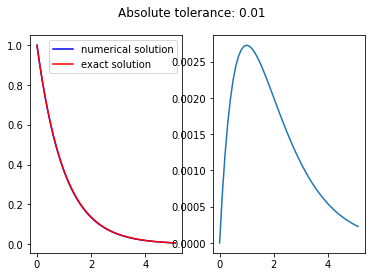

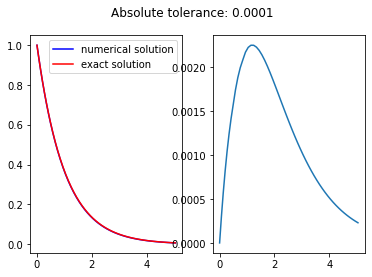

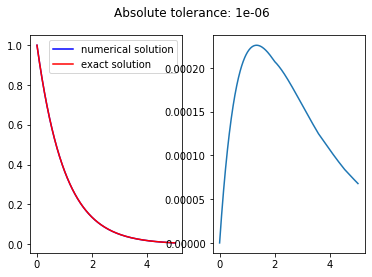

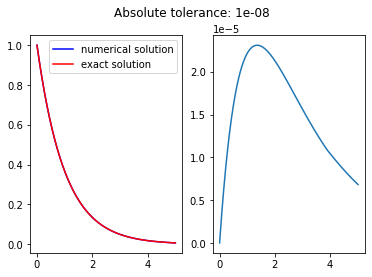

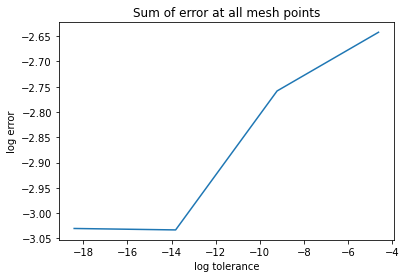

In [8]:
tolerance_range = [1e-2, 1e-4, 1e-6, 1e-8]
mesh_list = []
soln_list = []
for tolerance in tolerance_range:
    problem = solver.AdaptiveMethod(
        func, x_min, x_max, initial_value, initial_mesh=0.1)

    # Solve with adaptive ode23 method
    mesh, soln = problem.ode45(abs_tol=tolerance, rel_tol=1e-15)
    mesh_list.append(mesh)
    soln_list.append(soln)

# Calculation of exact solution for given mesh points
# Calculation of difference between exact solution and numerical solution
exact_soln_list = []
error_list = []
for (mesh,soln) in zip(mesh_list,soln_list):
    exact_soln = []
    error = []
    for i in range(len(mesh)):
        exact_value = analytical_soln(mesh[i], soln[i])
        exact_soln.append(exact_value)
        
        err_value = np.linalg.norm(np.array(exact_value) - np.array(soln[i]))
        error.append(err_value)
        
    exact_soln_list.append(exact_soln)
    error_list.append(error)

# Plot of numerical solution and exact solution
# Plot of error
for i in range(len(mesh_list)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Absolute tolerance: ' + str(tolerance_range[i]))
    ax1.plot(mesh_list[i], soln_list[i], 'b', label='numerical solution')
    ax1.plot(mesh_list[i], exact_soln_list[i], 'r', label='exact solution')
    ax1.legend()
    ax2.plot(mesh_list[i], error_list[i])
    plt.show()
    
# error_stepsize = []
# for i in range(len(tolerance_range)):
#     error_stepsize.append(error_list[i][int(3/tolerance_range[i])])

# plt.figure()
# plt.plot(np.log(np.array(tolerance_range)), np.log(np.array(error_stepsize)))
# plt.scatter(np.log(np.array(tolerance_range)), np.log(np.array(error_stepsize)))
# plt.title('Error at one mesh point')
# plt.xlabel('log stepsize')
# plt.ylabel('log error')
# plt.show()

sum_error_stepsize = []
for i in range(len(tolerance_range)):
    sum_error_stepsize.append(np.sum(np.array(error_list[i])))

plt.figure()
plt.plot(np.log(np.array(tolerance_range)), np.log(np.array(sum_error_stepsize)))
plt.title('Sum of error at all mesh points')
plt.xlabel('log tolerance')
plt.ylabel('log error')
plt.show()

## Testing of adaptive method - relative tolerance

A comparison of the adaptive method with varying relative tolerance.

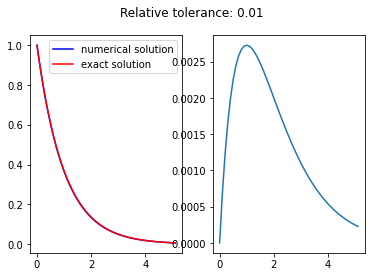

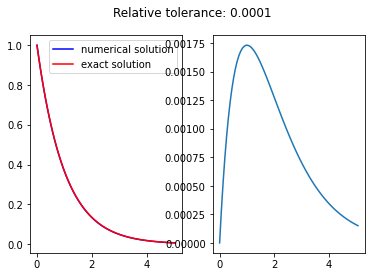

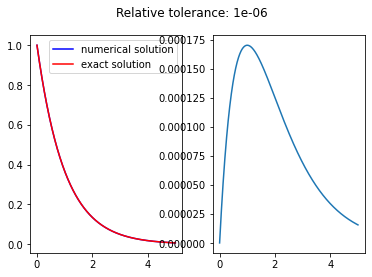

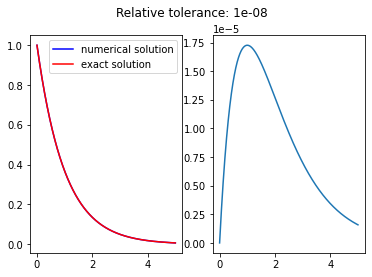

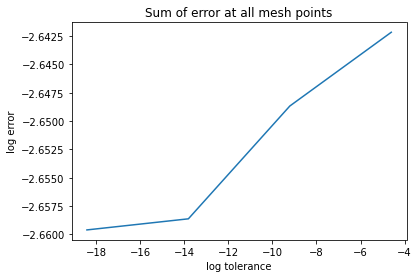

In [9]:
mesh_list = []
soln_list = []
for tolerance in tolerance_range:
    problem = solver.AdaptiveMethod(
        func, x_min, x_max, initial_value, initial_mesh=0.1)

    # Solve with adaptive ode23 method
    mesh, soln = problem.ode45(abs_tol=1e-15, rel_tol=tolerance)
    mesh_list.append(mesh)
    soln_list.append(soln)

# Calculation of exact solution for given mesh points
# Calculation of difference between exact solution and numerical solution
exact_soln_list = []
error_list = []
for (mesh,soln) in zip(mesh_list,soln_list):
    exact_soln = []
    error = []
    for i in range(len(mesh)):
        exact_value = analytical_soln(mesh[i], soln[i])
        exact_soln.append(exact_value)
        
        err_value = np.linalg.norm(np.array(exact_value) - np.array(soln[i]))
        error.append(err_value)
        
    exact_soln_list.append(exact_soln)
    error_list.append(error)

# Plot of numerical solution and exact solution
# Plot of error
for i in range(len(mesh_list)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('Relative tolerance: ' + str(tolerance_range[i]))
    ax1.plot(mesh_list[i], soln_list[i], 'b', label='numerical solution')
    ax1.plot(mesh_list[i], exact_soln_list[i], 'r', label='exact solution')
    ax1.legend()
    ax2.plot(mesh_list[i], error_list[i])
    plt.show()
    
# error_stepsize = []
# for i in range(len(tolerance_range)):
#     error_stepsize.append(error_list[i][int(3/tolerance_range[i])])

# plt.figure()
# plt.plot(np.log(np.array(tolerance_range)), np.log(np.array(error_stepsize)))
# plt.scatter(np.log(np.array(tolerance_range)), np.log(np.array(error_stepsize)))
# plt.title('Error at one mesh point')
# plt.xlabel('log stepsize')
# plt.ylabel('log error')
# plt.show()

sum_error_stepsize = []
for i in range(len(tolerance_range)):
    sum_error_stepsize.append(np.sum(np.array(error_list[i])))

plt.figure()
plt.plot(np.log(np.array(tolerance_range)), np.log(np.array(sum_error_stepsize)))
plt.title('Sum of error at all mesh points')
plt.xlabel('log tolerance')
plt.ylabel('log error')
plt.show()